# Torchy demo on Iris Species dataset

### Import essential dependencies

In [1]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_iris

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Install and import Torchy dependencies

In [2]:
pip install torchy-nn

Note: you may need to restart the kernel to use updated packages.


In [3]:
from torchy.sequential import Sequential
import torchy.layer as layer
import torchy.loss as loss
import torchy.optim as optim

In [4]:
np.random.seed(42)

### Load Iris dataset

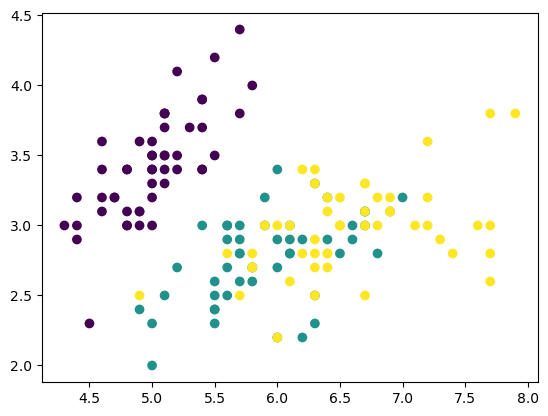

In [5]:
X, y = load_iris(return_X_y=True)

plt.scatter(X[:,0], X[:,1], c=y)

### Define Torchy model

In [6]:
# Defining process works exactly the same as if it were done with PyTorch

model = Sequential(
    layer.Linear(4, 16),
    layer.BatchNorm1d(16),
    layer.ReLU(),
    
    layer.Linear(16, 32),
    layer.BatchNorm1d(32),
    layer.ReLU(),
    
    layer.Linear(32, 4)
)

criterion = loss.CrossEntropyLoss()
optimizer = optim.MomentumSGD(model.params(), lr=1e-3, weight_decay=1e-5)

### Define train function

In [7]:
def train_model(X, y, model, criterion, optimizer, n_epochs=40):
    loss_history = []
    acc_history = []
    
    for epoch in range(n_epochs):
        
        predictions = model(X)
        
        # First difference is every loss object returns loss and its gradient
        loss, grad = criterion(predictions, y)
        
        optimizer.zero_grad()
        model.backward(grad)  # Call backward on model object and pass gradient from loss as argument
        optimizer.step()
        
        pred_indices = np.argmax(predictions, axis=1)
        accuracy = (np.sum(y == pred_indices)) / y.shape[0]
        
        acc_history.append(accuracy)
        loss_history.append(loss)
        
        print(f"Epoch #{epoch} | Accuracy: {np.round(accuracy * 100, 2)}% | Loss: {np.round(loss, 2)}")
        
    return loss_history, acc_history

### Training process

In [8]:
loss_history, acc_history = train_model(X, y, model, criterion, optimizer)

Epoch #0 | Accuracy: 0.0% | Loss: 1.39
Epoch #1 | Accuracy: 0.0% | Loss: 1.39
Epoch #2 | Accuracy: 80.67% | Loss: 1.38
Epoch #3 | Accuracy: 92.67% | Loss: 1.38
Epoch #4 | Accuracy: 90.67% | Loss: 1.38
Epoch #5 | Accuracy: 88.0% | Loss: 1.37
Epoch #6 | Accuracy: 85.33% | Loss: 1.37
Epoch #7 | Accuracy: 84.67% | Loss: 1.36
Epoch #8 | Accuracy: 84.67% | Loss: 1.35
Epoch #9 | Accuracy: 84.67% | Loss: 1.34
Epoch #10 | Accuracy: 84.67% | Loss: 1.32
Epoch #11 | Accuracy: 85.33% | Loss: 1.31
Epoch #12 | Accuracy: 86.0% | Loss: 1.29
Epoch #13 | Accuracy: 86.0% | Loss: 1.28
Epoch #14 | Accuracy: 86.0% | Loss: 1.26
Epoch #15 | Accuracy: 86.67% | Loss: 1.24
Epoch #16 | Accuracy: 89.33% | Loss: 1.22
Epoch #17 | Accuracy: 90.67% | Loss: 1.19
Epoch #18 | Accuracy: 90.67% | Loss: 1.17
Epoch #19 | Accuracy: 91.33% | Loss: 1.15
Epoch #20 | Accuracy: 93.33% | Loss: 1.13
Epoch #21 | Accuracy: 94.67% | Loss: 1.1
Epoch #22 | Accuracy: 95.33% | Loss: 1.08
Epoch #23 | Accuracy: 95.33% | Loss: 1.05
Epoch #24 |

### Plot accuracies and losses over entire training

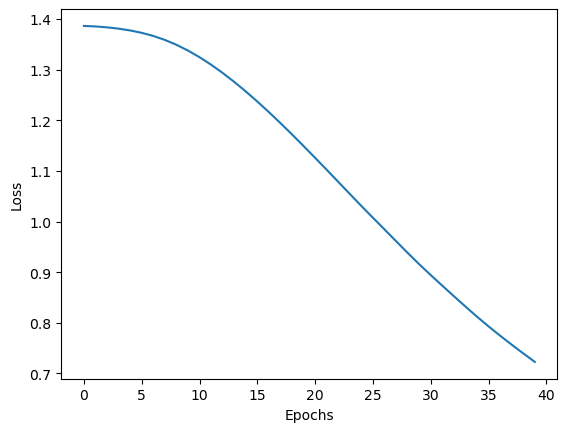

In [9]:
plt.plot(loss_history)

plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.show()

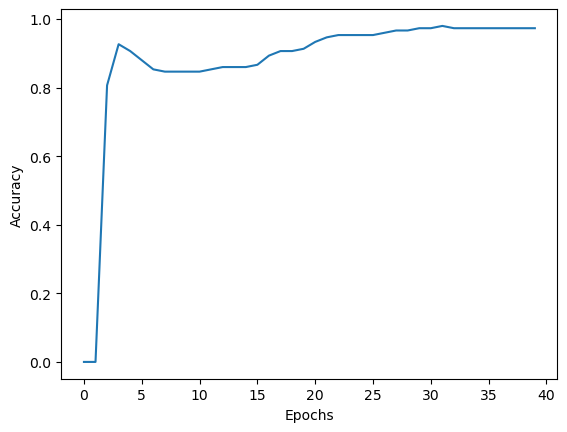

In [10]:
plt.plot(acc_history)

plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.show()